# Shattered Class - Random Backdoor Classes

In [ ]:
from fastai.vision.all import *

from adv_ml.all import *

from facial_misrecognition_systems.class_backdoors import *
from facial_misrecognition_systems.weight_surgery import *

In [ ]:
pfr = PinterestFaces()

class RandomSCExperiment(RepeatedExperiment):
    def iteration(self):
        self.model.fit_threshold(self.dls.train)

        learn = Learner(self.dls, self.model, metrics=accuracy, cbs=WSSC(BackdoorData(pfr)))
        res = {}
        
        res['pre attack/benign accuracy'] = learn.validate()[1]
        res['pre attack/attack success rate'] = learn.validate(2)[1]
        
        learn.wssc.edit_model()
        res['post attack/benign accuracy'] = learn.validate()[1]
        res['post attack/attack success rate'] = learn.validate(2)[1]

        return res

In [ ]:
res = RandomSCExperiment(facenet(), LFWPairs().test()).run()

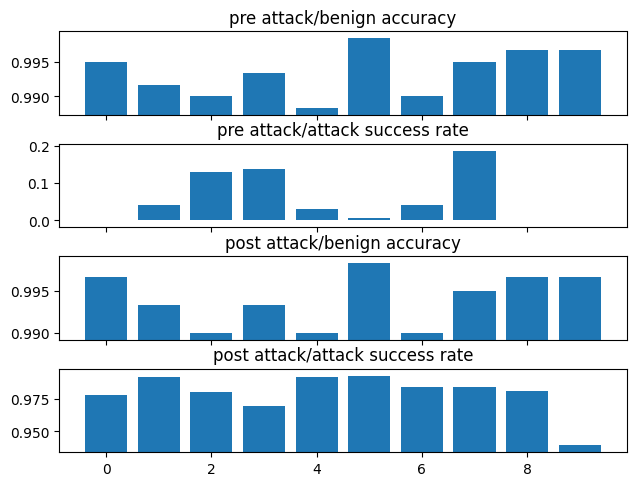

In [ ]:
res.plot_stats()